#### K-means clustering

In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.cluster import KMeans

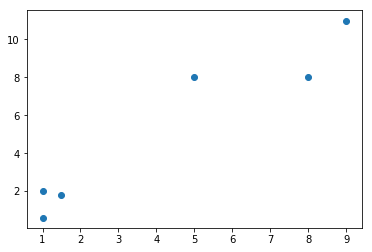

In [37]:
x = [1, 5, 1.5, 8, 1, 9]
y = [2, 8, 1.8, 8, 0.6, 11]
plt.scatter(x,y)
xl=plt.xlim(); yl=plt.ylim()

kmeansを使うためにポイントデータを変換しなければならない。ひと手間かかる

In [38]:
X=np.c_[x,y]
X

array([[ 1. ,  2. ],
       [ 5. ,  8. ],
       [ 1.5,  1.8],
       [ 8. ,  8. ],
       [ 1. ,  0.6],
       [ 9. , 11. ]])

In [39]:
N=2
kmeans = KMeans(n_clusters=N)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [40]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(centroids)
print(labels)

[[7.33333333 9.        ]
 [1.16666667 1.46666667]]
[1 0 1 0 1 0]


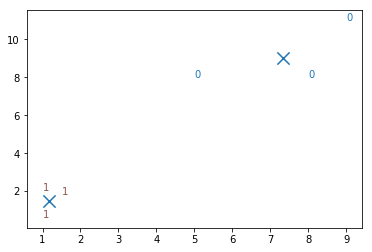

In [41]:
for i in range(len(X)):
    plt.text(X[i][0], X[i][1], str(labels[i]), color=plt.cm.tab20(labels[i] / N))

plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
plt.xlim(xl); plt.ylim(yl);
plt.show()

これの困ったところはラベルの振り方が毎回変わってしまう。乱数シードを固定することでとりあえず固定するにしても、例えばもともと真ラベルのあるデータで、教師あり学習との比較をしたいとき、真ラベルとの対応をつけるのに並べ替えアルゴリズムが必要となり、正直に解くとクラス数が多い場合permutationでとんでもない計算量になったりする。うまい解決法は？